# BFS Demographic Data - Group 48

# Step 1: Read Data Set

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

demographic_data = pd.read_csv("E:\\Sushma\\BFSI - Domain Elective\\Capstone Project\\Demographic data.csv", sep=",")
demographic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71295 non-null int64
Age                                            71295 non-null int64
Gender                                         71293 non-null object
Marital Status (at the time of application)    71289 non-null object
No of dependents                               71292 non-null float64
Income                                         71295 non-null float64
Education                                      71176 non-null object
Profession                                     71281 non-null object
Type of residence                              71287 non-null object
No of months in current residence              71295 non-null int64
No of months in current company                71295 non-null int64
Performance Tag                                69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.5+ MB


In [3]:
# To display no of rows and column as required
pd.options.display.max_rows = 999
pd.set_option('display.max_columns', 500)

In [4]:
demographic_data.shape

(71295, 12)

# Step 2: Data Understanding

In [5]:
demographic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71295 non-null int64
Age                                            71295 non-null int64
Gender                                         71293 non-null object
Marital Status (at the time of application)    71289 non-null object
No of dependents                               71292 non-null float64
Income                                         71295 non-null float64
Education                                      71176 non-null object
Profession                                     71281 non-null object
Type of residence                              71287 non-null object
No of months in current residence              71295 non-null int64
No of months in current company                71295 non-null int64
Performance Tag                                69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.5+ MB


In [6]:
demographic_data.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


# Step 3: Data Preparation 

Duplicates

In [7]:
demographic_data[demographic_data['Application ID'].duplicated()]

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
27586,765011468,38,M,Married,4.0,4.5,Professional,SAL,Rented,6,72,0.0
42637,653287861,40,M,Married,5.0,32.0,Phd,SE,Rented,45,46,1.0
59022,671989187,57,M,Married,4.0,7.0,Professional,SE,Rented,42,3,0.0


In [8]:
demographic_data.drop_duplicates(subset = ['Application ID'],inplace=True)

In [9]:
demographic_data.isnull().any()

Application ID                                 False
Age                                            False
Gender                                          True
Marital Status (at the time of application)     True
No of dependents                                True
Income                                         False
Education                                       True
Profession                                      True
Type of residence                               True
No of months in current residence              False
No of months in current company                False
Performance Tag                                 True
dtype: bool

Outlier Treatment

In [10]:
### Removing outliers from the dataframe
demographic_data = demographic_data[(demographic_data['Age'] >=18)]

In [11]:
demographic_data.isnull().sum().sum()*100.0/demographic_data.shape[0]

2.2084321956561417

In [12]:
demographic_data.dropna(subset=['Gender'], inplace=True)
demographic_data.dropna(subset=['Marital Status (at the time of application)'], inplace=True)
demographic_data.dropna(subset=['No of dependents'], inplace=True)
demographic_data.dropna(subset=['Education'], inplace=True)
demographic_data.dropna(subset=['Profession '], inplace=True)
demographic_data.dropna(subset=['Type of residence'], inplace=True)
demographic_data.dropna(subset=['Performance Tag'], inplace=True)

In [13]:
demographic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69656 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 69656 non-null int64
Age                                            69656 non-null int64
Gender                                         69656 non-null object
Marital Status (at the time of application)    69656 non-null object
No of dependents                               69656 non-null float64
Income                                         69656 non-null float64
Education                                      69656 non-null object
Profession                                     69656 non-null object
Type of residence                              69656 non-null object
No of months in current residence              69656 non-null int64
No of months in current company                69656 non-null int64
Performance Tag                                69656 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.9+ MB


In [14]:
demographic_data_copy = demographic_data

In [15]:
# Determine the percentage of people who have bought the investment product, that is those who have the response varibale as 1

100*(demographic_data['Performance Tag'].sum()/demographic_data['Performance Tag'].count()).round(4)

4.22

# Step 4: EDA

Age

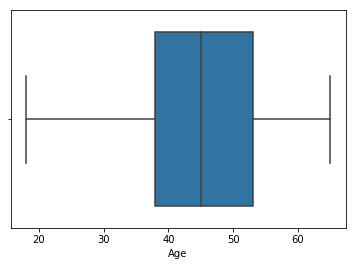

In [16]:
sns.boxplot(x='Age', data=demographic_data)
plt.show()

In [17]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the response rates
bins = np.arange(10,demographic_data['Age'].max() + 10, 10)
demographic_data['Age_bins'] = pd.cut(demographic_data['Age'], bins, include_lowest=True)

In [18]:
No_of_prospect = demographic_data.groupby('Age_bins')['Performance Tag'].count().reset_index(name = 'No.of_prospect')

In [19]:
count_prospects = demographic_data[demographic_data['Performance Tag']==1].groupby('Age_bins')['Performance Tag'].count().reset_index(name = 'count_prospects')

In [20]:
agg_age = No_of_prospect.merge(count_prospects, on='Age_bins')

In [21]:
agg_age['response_rate'] = 100*(agg_age['count_prospects']/agg_age['No.of_prospect']).round(3)

In [22]:
agg_age

,Age_bins,No.of_prospect,count_prospects,response_rate
0,"(9.999, 20.0]",75,2,2.7
1,"(20.0, 30.0]",5786,238,4.1
2,"(30.0, 40.0]",18642,828,4.4
3,"(40.0, 50.0]",22823,956,4.2
4,"(50.0, 60.0]",17506,717,4.1
5,"(60.0, 70.0]",4824,200,4.1


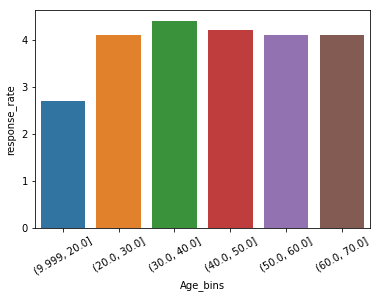

In [23]:
ax = sns.barplot(x='Age_bins', y='response_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

As we can see, the age group that begins to earn at about 22+ until they retire, have applied for credit card

Lets do it similarly for Gender, and Marital Status too

In [24]:
demographic_data['Gender'].value_counts()

M    53192
F    16464
Name: Gender, dtype: int64

In [25]:
count_prospects_gender = demographic_data.groupby('Gender')['Performance Tag'].sum().reset_index(name = 'count_prospects')

In [26]:
No_of_prospect_gender = demographic_data.groupby('Gender')['Performance Tag'].count().reset_index(name = 'No_of_prospects')

In [27]:
agg_gender = count_prospects_gender.merge(No_of_prospect_gender, on = 'Gender')

In [28]:
agg_gender['response_rate'] = 100*(agg_gender['count_prospects']/agg_gender['No_of_prospects']).round(4)

In [29]:
agg_gender

,Gender,count_prospects,No_of_prospects,response_rate
0,F,717.0,16464,4.35
1,M,2224.0,53192,4.18


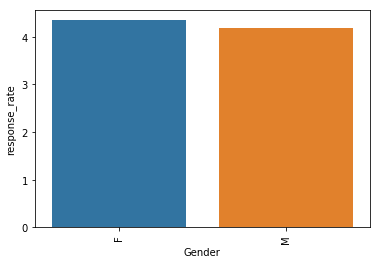

In [30]:
ax = sns.barplot(x='Gender', y='response_rate', data=agg_gender)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

Not a significant difference amongst the 2 genders which can be useful for our insight

In [31]:
demographic_data.rename(columns = {'Marital Status (at the time of application)': 'Marital Status'}, inplace=True) 

In [32]:
demographic_data['Marital Status'].value_counts()

Married    59385
Single     10271
Name: Marital Status, dtype: int64

In [33]:
count_prospects_marital = demographic_data.groupby('Marital Status')['Performance Tag'].sum().reset_index(name = 'count_prospects')

In [34]:
No_of_prospect_marital = demographic_data.groupby('Marital Status')['Performance Tag'].count().reset_index(name = 'No_of_prospects')

In [35]:
agg_marital = count_prospects_marital.merge(No_of_prospect_marital, on = 'Marital Status')

In [36]:
agg_marital['response_rate'] = 100*(agg_marital['count_prospects']/agg_marital['No_of_prospects']).round(4)

In [37]:
agg_marital

,Marital Status,count_prospects,No_of_prospects,response_rate
0,Married,2497.0,59385,4.20
1,Single,444.0,10271,4.32


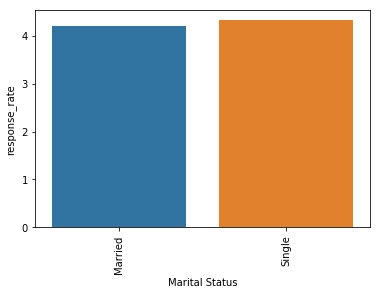

In [38]:
ax = sns.barplot(x='Marital Status', y='response_rate', data=agg_marital)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

No significant insight from Marital Status either

In [39]:
demographic_data['Education'].value_counts()

Professional    24353
Masters         23457
Bachelor        17274
Phd              4454
Others            118
Name: Education, dtype: int64

In [40]:
count_prospects_education = demographic_data.groupby('Education')['Performance Tag'].sum().reset_index(name = 'count_prospects')

In [41]:
No_of_prospect_education = demographic_data.groupby('Education')['Performance Tag'].count().reset_index(name = 'No_of_prospects')

In [42]:
agg_education = count_prospects_education.merge(No_of_prospect_education, on = 'Education')

In [43]:
agg_education['response_rate'] = 100*(agg_education['count_prospects']/agg_education['No_of_prospects']).round(4)

In [44]:
agg_education

,Education,count_prospects,No_of_prospects,response_rate
0,Bachelor,741.0,17274,4.29
1,Masters,998.0,23457,4.25
2,Others,8.0,118,6.78
3,Phd,183.0,4454,4.11
4,Professional,1011.0,24353,4.15


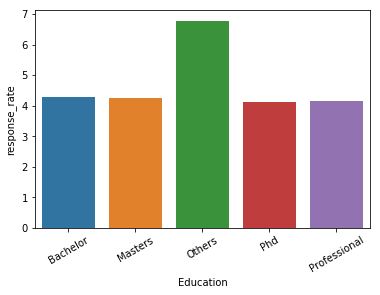

In [45]:
ax = sns.barplot(x='Education', y='response_rate', data=agg_education)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

The response rate is almost the same for PhD and Professional, the least of all, owing to the fact that they are always serious with their work. The next being Bachelors and Masters with a siginificant response rate. The highest being others, which could be anything from High School pass outs to primary education to illiterates. The array may vary significantly.

In [46]:
demographic_data['Profession '].value_counts()

SAL        39573
SE_PROF    16193
SE         13890
Name: Profession , dtype: int64

In [47]:
count_prospects_profession = demographic_data.groupby('Profession ')['Performance Tag'].sum().reset_index(name = 'count_prospects')

In [48]:
No_of_prospect_profession = demographic_data.groupby('Profession ')['Performance Tag'].count().reset_index(name = 'No_of_prospects')

In [49]:
agg_profession = count_prospects_profession.merge(No_of_prospect_profession, on = 'Profession ')

In [50]:
agg_profession['response_rate'] = 100*(agg_profession['count_prospects']/agg_profession['No_of_prospects']).round(4)

In [51]:
agg_profession

,Profession,count_prospects,No_of_prospects,response_rate
0,SAL,1627.0,39573,4.11
1,SE,641.0,13890,4.61
2,SE_PROF,673.0,16193,4.16


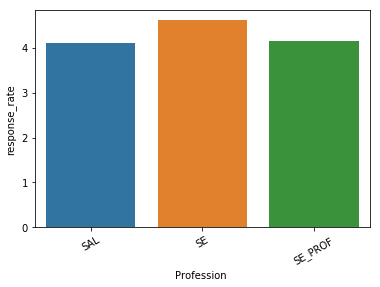

In [52]:
ax = sns.barplot(x='Profession ', y='response_rate', data=agg_profession)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

The profession SE has the highest response rate

In [53]:
demographic_data['Type of residence'].value_counts()

Rented                 52146
Owned                  13956
Living with Parents     1761
Company provided        1596
Others                   197
Name: Type of residence, dtype: int64

In [54]:
count_prospects_housing = demographic_data.groupby('Type of residence')['Performance Tag'].sum().reset_index(name = 'count_prospects')

In [55]:
No_of_prospect_housing = demographic_data.groupby('Type of residence')['Performance Tag'].count().reset_index(name = 'No_of_prospects')

In [56]:
agg_housing = count_prospects_housing.merge(No_of_prospect_housing, on = 'Type of residence')

In [57]:
agg_housing['response_rate'] = 100*(agg_housing['count_prospects']/agg_housing['No_of_prospects']).round(4)

In [58]:
agg_housing

,Type of residence,count_prospects,No_of_prospects,response_rate
0,Company provided,72.0,1596,4.51
1,Living with Parents,80.0,1761,4.54
2,Others,5.0,197,2.54
3,Owned,591.0,13956,4.23
4,Rented,2193.0,52146,4.21


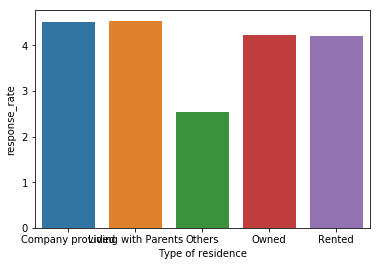

In [59]:
ax = sns.barplot(x='Type of residence', y='response_rate', data=agg_housing)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

The applicants who lived in accomodation provided by their company or who lived with their parents had highest response rat, while ones who owned a house or rented it has a lesser response rate. Other categoyr had the least assuming either they are hostelites or they had no solid type of residence to be disclosed.

In [60]:
# inspect the columns
demographic_data.columns

Index(['Application ID', 'Age', 'Gender', 'Marital Status', 'No of dependents',
       'Income', 'Education', 'Profession ', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag', 'Age_bins'],
      dtype='object')

In [61]:
# Droping the column age_bins we had created for the purpose of data visualisation
demographic_data.drop(columns = 'Age_bins', inplace = True)

In [62]:
# Creating a dummy variable for the variable 'job' and dropping the first one.

job = pd.get_dummies(demographic_data['Profession '],prefix='Profession',drop_first=True)

#Adding the results to the master dataframe

demographic_data = pd.concat([demographic_data,job],axis=1)

In [63]:
# Creating dummy variable for marital column

marital = pd.get_dummies(demographic_data['Marital Status'],prefix='Marital',drop_first=True)
demographic_data = pd.concat([demographic_data,marital],axis=1)

In [64]:
# Creating dummy variable for education column

education = pd.get_dummies(demographic_data['Education'],prefix='Education',drop_first=True)
demographic_data = pd.concat([demographic_data,education],axis=1)

In [65]:
# Creating dummy variable for housing column

housing = pd.get_dummies(demographic_data['Type of residence'],prefix='Residence',drop_first=True)
demographic_data = pd.concat([demographic_data,housing],axis=1)

In [66]:
# Creating dummy variable for loan column

Gender= pd.get_dummies(demographic_data['Gender'],prefix='Gender',drop_first=True)
demographic_data = pd.concat([demographic_data,Gender],axis=1)

In [67]:
# Creating dummy variable for education column

dependants = pd.get_dummies(demographic_data['No of dependents'],prefix='Dependants',drop_first=True)
demographic_data = pd.concat([demographic_data,dependants],axis=1)

In [68]:
demographic_data.columns

Index(['Application ID', 'Age', 'Gender', 'Marital Status', 'No of dependents',
       'Income', 'Education', 'Profession ', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag', 'Profession_SE', 'Profession_SE_PROF',
       'Marital_Single', 'Education_Masters', 'Education_Others',
       'Education_Phd', 'Education_Professional',
       'Residence_Living with Parents', 'Residence_Others', 'Residence_Owned',
       'Residence_Rented', 'Gender_M', 'Dependants_2.0', 'Dependants_3.0',
       'Dependants_4.0', 'Dependants_5.0'],
      dtype='object')

In [69]:
demographic_data.drop(['Gender', 'Marital Status', 'Education', 'Profession ', 'Type of residence', 'No of dependents']
                      , axis=1, inplace = True)

In [70]:
# # DF TO EXCEL
# from pandas import ExcelWriter

# writer = ExcelWriter('E:\\Sushma\\BFSI - Domain Elective\\Capstone Project\\Demographic data Dummies.xlsx')
# demographic_data.to_excel(writer,'Sheet1')
# writer.save()

In [71]:
# # DF TO EXCEL
# from pandas import ExcelWriter

# writer = ExcelWriter('E:\\Sushma\\BFSI - Domain Elective\\Capstone Project\\Demographic data original.xlsx')
# demographic_data_copy.to_excel(writer,'Sheet1')
# writer.save()

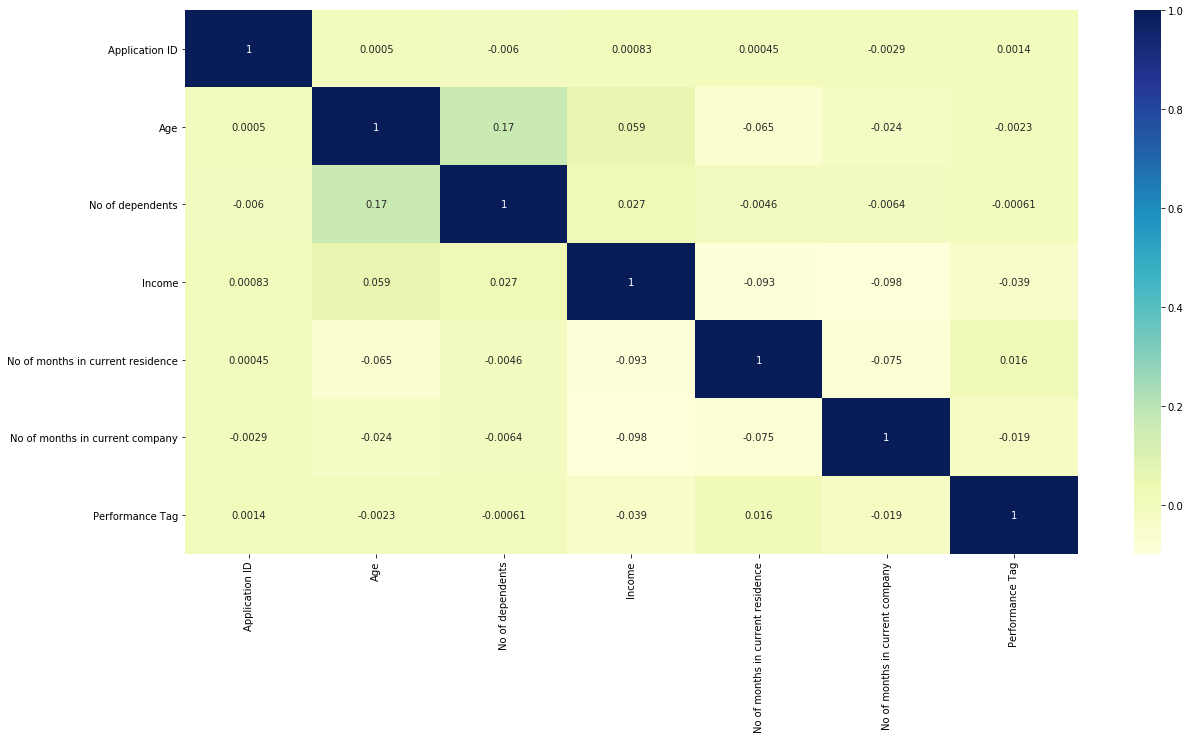

In [72]:
plt.figure(figsize = (20,10)) 
sns.heatmap(demographic_data_copy.corr(), cmap="YlGnBu", annot = True)
plt.show()

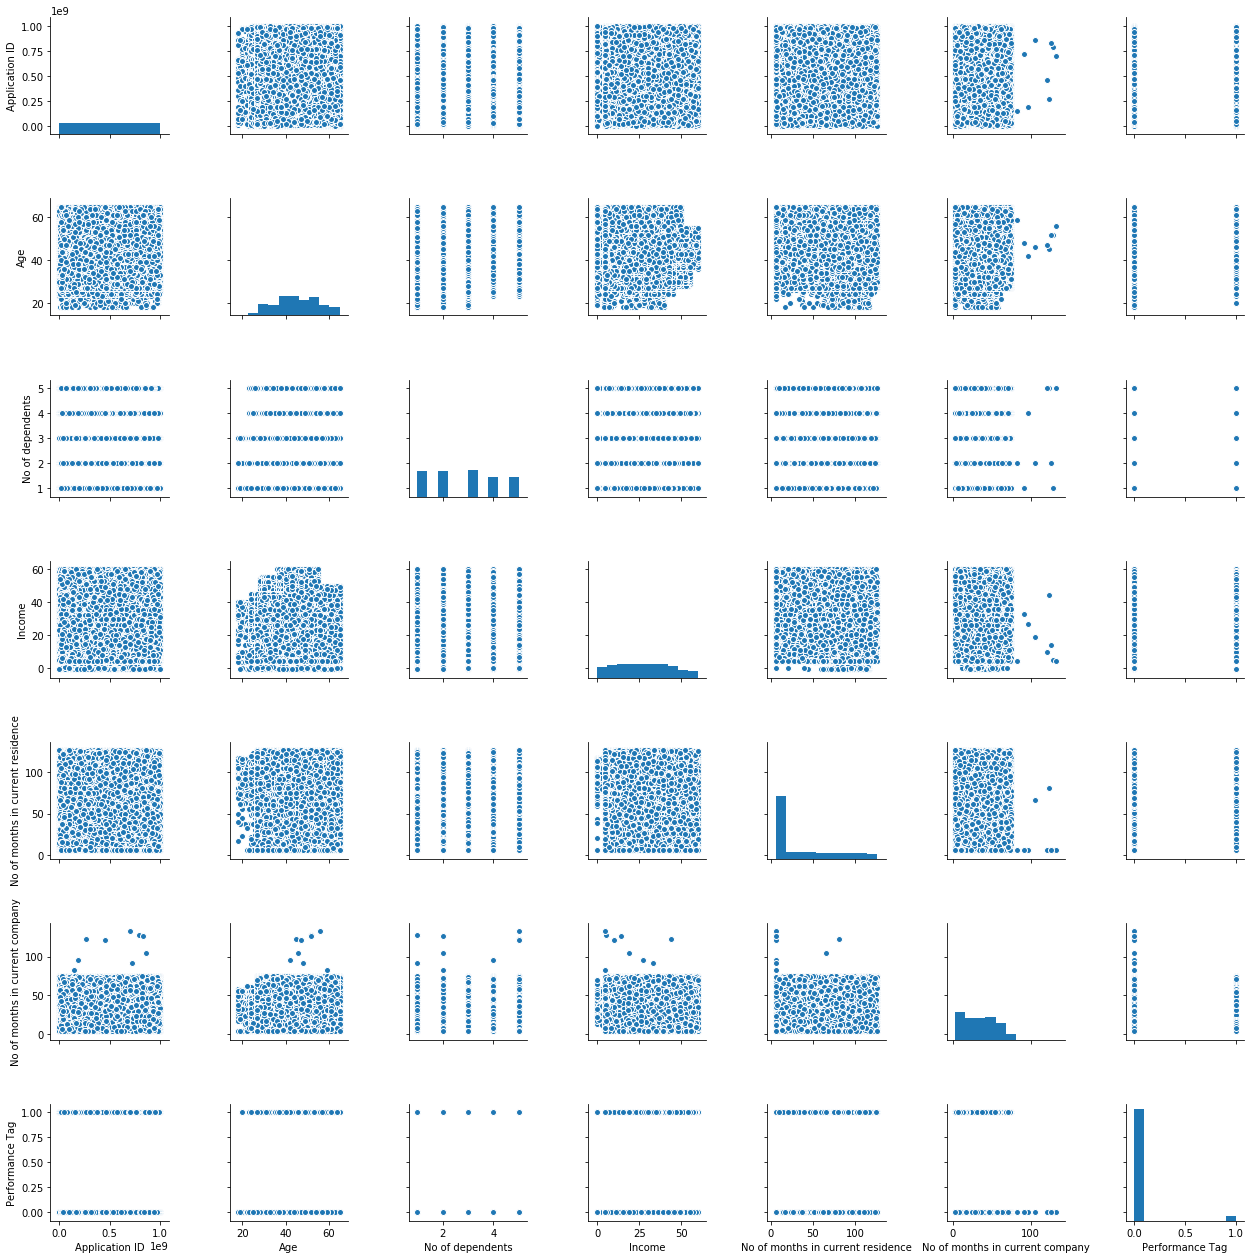

In [73]:
sns.pairplot(demographic_data_copy)
plt.show()

# Step 5: Logistic Regression Modelling

## Test Train Split

In [74]:
# Import library to split the dataset into test and train
from sklearn.model_selection import train_test_split

In [75]:
# Putting feature variable to X
X = demographic_data.drop(['Performance Tag', 'Application ID'],axis=1)

# Putting response variable to y
y = demographic_data['Performance Tag']

Standard Scaler

In [76]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [77]:
X_train.head()

,Age,Income,No of months in current residence,No of months in current company,Profession_SE,Profession_SE_PROF,Marital_Single,Education_Masters,Education_Others,Education_Phd,Education_Professional,Residence_Living with Parents,Residence_Others,Residence_Owned,Residence_Rented,Gender_M,Dependants_2.0,Dependants_3.0,Dependants_4.0,Dependants_5.0
32789,48,31.0,6,30,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
30386,51,23.0,6,18,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0
12863,50,40.0,6,40,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
49912,54,9.0,89,64,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0
7629,46,56.0,48,27,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1


In [78]:
# Standardisation continuous features for X_train
X_train_df = X_train[['Age', 'No of months in current residence', 'No of months in current company']]
std_X_train_df=(X_train_df-X_train_df.mean())/X_train_df.std()
X_train = X_train.drop(['Age', 'No of months in current residence', 'No of months in current company'], 1)
X_train = pd.concat([X_train,std_X_train_df],axis=1)

In [79]:
# Standardisation continuous features for X_train
X_test_df = X_test[['Age', 'No of months in current residence', 'No of months in current company']]
std_X_test_df=(X_test_df-X_test_df.mean())/X_test_df.std()
X_test = X_test.drop(['Age', 'No of months in current residence', 'No of months in current company'], 1)
X_test = pd.concat([X_test,std_X_test_df],axis=1)

## Logistic Regression using RFE

In [80]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [81]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Income', False, 6),
 ('Profession_SE', True, 1),
 ('Profession_SE_PROF', False, 11),
 ('Marital_Single', False, 5),
 ('Education_Masters', False, 3),
 ('Education_Others', True, 1),
 ('Education_Phd', False, 7),
 ('Education_Professional', False, 8),
 ('Residence_Living with Parents', False, 9),
 ('Residence_Others', True, 1),
 ('Residence_Owned', False, 2),
 ('Residence_Rented', True, 1),
 ('Gender_M', True, 1),
 ('Dependants_2.0', True, 1),
 ('Dependants_3.0', False, 4),
 ('Dependants_4.0', True, 1),
 ('Dependants_5.0', True, 1),
 ('Age', False, 10),
 ('No of months in current residence', True, 1),
 ('No of months in current company', True, 1)]

In [82]:
Top10 = X_train.columns[rfe.support_]
print ("Top 10 columns\n",Top10)
col = X_train.columns[~rfe.support_]
print ("\n\n\n Not top 10 columns\n",X_train.columns[~rfe.support_])

Top 10 columns
 Index(['Profession_SE', 'Education_Others', 'Residence_Others',
       'Residence_Rented', 'Gender_M', 'Dependants_2.0', 'Dependants_4.0',
       'Dependants_5.0', 'No of months in current residence',
       'No of months in current company'],
      dtype='object')



 Not top 10 columns
 Index(['Income', 'Profession_SE_PROF', 'Marital_Single', 'Education_Masters',
       'Education_Phd', 'Education_Professional',
       'Residence_Living with Parents', 'Residence_Owned', 'Dependants_3.0',
       'Age'],
      dtype='object')


In [83]:
X_train_rfe = X_train[Top10]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm_1 = sm.GLM(y_train,X_train_rfe).fit()   # Running the linear model
print(lm_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        Performance Tag   No. Observations:                48759
Model:                            GLM   Df Residuals:                    48748
Model Family:                Gaussian   Df Model:                           10
Link Function:               identity   Scale:                        0.040449
Method:                          IRLS   Log-Likelihood:                 9021.8
Date:                Sun, 15 Sep 2019   Deviance:                       1971.8
Time:                        14:47:18   Pearson chi2:                 1.97e+03
No. Iterations:                     3   Covariance Type:             nonrobust
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0468      0.003     17.414      0.000       0

In [84]:
X_train_rfe = X_train_rfe.drop(["Residence_Rented"], axis = 1)

In [85]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm_2 = sm.GLM(y_train,X_train_rfe).fit()   # Running the linear model
print(lm_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        Performance Tag   No. Observations:                48759
Model:                            GLM   Df Residuals:                    48749
Model Family:                Gaussian   Df Model:                            9
Link Function:               identity   Scale:                        0.040448
Method:                          IRLS   Log-Likelihood:                 9021.7
Date:                Sun, 15 Sep 2019   Deviance:                       1971.8
Time:                        14:47:18   Pearson chi2:                 1.97e+03
No. Iterations:                     3   Covariance Type:             nonrobust
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0464      0.002     21.117      0.000       0

In [86]:
X_train_rfe = X_train_rfe.drop(["Residence_Others"], axis = 1)

In [87]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm_3 = sm.GLM(y_train,X_train_rfe).fit()   # Running the linear model
print(lm_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        Performance Tag   No. Observations:                48759
Model:                            GLM   Df Residuals:                    48750
Model Family:                Gaussian   Df Model:                            8
Link Function:               identity   Scale:                        0.040448
Method:                          IRLS   Log-Likelihood:                 9021.5
Date:                Sun, 15 Sep 2019   Deviance:                       1971.8
Time:                        14:47:18   Pearson chi2:                 1.97e+03
No. Iterations:                     3   Covariance Type:             nonrobust
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0464      0.002     21.107      0.000       0

In [88]:
X_train_rfe = X_train_rfe.drop(["Dependants_5.0"], axis = 1)

In [89]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm_4 = sm.GLM(y_train,X_train_rfe).fit()   # Running the linear model
print(lm_4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        Performance Tag   No. Observations:                48759
Model:                            GLM   Df Residuals:                    48751
Model Family:                Gaussian   Df Model:                            7
Link Function:               identity   Scale:                        0.040448
Method:                          IRLS   Log-Likelihood:                 9021.2
Date:                Sun, 15 Sep 2019   Deviance:                       1971.9
Time:                        14:47:18   Pearson chi2:                 1.97e+03
No. Iterations:                     3   Covariance Type:             nonrobust
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0458      0.002     22.092      0.000       0

In [90]:
X_train_rfe = X_train_rfe.drop(["Dependants_4.0"], axis = 1)

In [91]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm_5 = sm.GLM(y_train,X_train_rfe).fit()   # Running the linear model
print(lm_5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        Performance Tag   No. Observations:                48759
Model:                            GLM   Df Residuals:                    48752
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                        0.040449
Method:                          IRLS   Log-Likelihood:                 9020.2
Date:                Sun, 15 Sep 2019   Deviance:                       1971.9
Time:                        14:47:18   Pearson chi2:                 1.97e+03
No. Iterations:                     3   Covariance Type:             nonrobust
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0450      0.002     22.519      0.000       0

In [92]:
X_train_rfe = X_train_rfe.drop(["Dependants_2.0"], axis = 1)

In [93]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm_6 = sm.GLM(y_train,X_train_rfe).fit()   # Running the linear model
print(lm_6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        Performance Tag   No. Observations:                48759
Model:                            GLM   Df Residuals:                    48753
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                        0.040450
Method:                          IRLS   Log-Likelihood:                 9019.0
Date:                Sun, 15 Sep 2019   Deviance:                       1972.0
Time:                        14:47:19   Pearson chi2:                 1.97e+03
No. Iterations:                     3   Covariance Type:             nonrobust
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0442      0.002     22.830      0.000       0

In [94]:
X_train_rfe = X_train_rfe.drop(["Profession_SE"], axis = 1)

In [95]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm_7 = sm.GLM(y_train,X_train_rfe).fit()   # Running the linear model
print(lm_7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        Performance Tag   No. Observations:                48759
Model:                            GLM   Df Residuals:                    48754
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                        0.040451
Method:                          IRLS   Log-Likelihood:                 9017.6
Date:                Sun, 15 Sep 2019   Deviance:                       1972.2
Time:                        14:47:19   Pearson chi2:                 1.97e+03
No. Iterations:                     3   Covariance Type:             nonrobust
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0450      0.002     23.964      0.000       0

In [96]:
X_train_rfe = X_train_rfe.drop(["Gender_M"], axis = 1)

In [97]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm_8 = sm.GLM(y_train,X_train_rfe).fit()   # Running the linear model
print(lm_8.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        Performance Tag   No. Observations:                48759
Model:                            GLM   Df Residuals:                    48755
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                        0.040453
Method:                          IRLS   Log-Likelihood:                 9016.1
Date:                Sun, 15 Sep 2019   Deviance:                       1972.3
Time:                        14:47:19   Pearson chi2:                 1.97e+03
No. Iterations:                     3   Covariance Type:             nonrobust
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0422      0.001     46.266      0.000       0

Clearly not satisfactory predictors for defaulters. Education and no. of months in the current residence/company may not be accurate to determine the defaulters

In [98]:
# Getting the predicted values on the train set
y_train_pred = lm_8.predict(X_train_rfe)
y_train_pred[:10]

32789    0.040714
30386    0.043163
12863    0.038673
49912    0.040528
7629     0.044744
37003    0.046224
49068    0.039769
27255    0.034183
5248     0.041956
13093    0.035203
dtype: float64

In [99]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.04071374, 0.0431629 , 0.03867278, 0.04052838, 0.04474367,
       0.04622434, 0.03976931, 0.03418266, 0.04195572, 0.03520315])

In [100]:
y_train_pred_final = pd.DataFrame({'Actual Response':y_train.values, 'Response_Prob':y_train_pred})
y_train_pred_final['Response Probability'] = y_train.index
y_train_pred_final.head()

,Actual Response,Response_Prob,Response Probability
0,0.0,0.040714,32789
1,0.0,0.043163,30386
2,0.0,0.038673,12863
3,0.0,0.040528,49912
4,0.0,0.044744,7629


In [101]:
y_train_pred_final['Predicted'] = y_train_pred_final.Response_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Actual Response,Response_Prob,Response Probability,Predicted
0,0.0,0.040714,32789,0
1,0.0,0.043163,30386,0
2,0.0,0.038673,12863,0
3,0.0,0.040528,49912,0
4,0.0,0.044744,7629,0


## Model Evaluation

In [102]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final['Actual Response'], y_train_pred_final.Predicted )
print(confusion)

[[46698     0]
 [ 2061     0]]


In [103]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(3, 3))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [104]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Actual Response'], y_train_pred_final.Response_Prob, drop_intermediate = False )

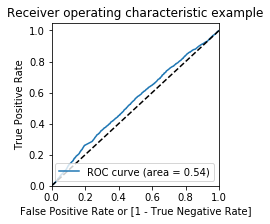

In [105]:
draw_roc(y_train_pred_final['Actual Response'], y_train_pred_final.Response_Prob)

In [106]:
auc_score = metrics.roc_auc_score( y_train_pred_final['Actual Response'], y_train_pred_final.Response_Prob )
print ('Auc for logistic regression = ', auc_score)

Auc for logistic regression =  0.5396154887810927


### AUC for Logistic Regression is 53.9%

# Step 6 : Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight="balanced")

In [108]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [109]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
No of months in current company,0.201412
Income,0.197526
Age,0.191059
No of months in current residence,0.142517
Gender_M,0.028225
Profession_SE_PROF,0.025888
Education_Professional,0.024553
Education_Masters,0.021922
Dependants_3.0,0.021907
Dependants_5.0,0.020420


### Optimise the model

In [110]:
# GridSearchCV to find optimal n_estimators for max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5]
}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    scoring="accuracy",
                    n_jobs = -1,
                    verbose = 1,
                    return_train_score=True
                 )
rf.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  4.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [111]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',rf.best_score_,'using',rf.best_params_)

We can get accuracy of 0.9577308804528395 using {'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


Modelling with the best hyper parameters

In [112]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=100)

In [113]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [114]:
# predict
predictions = rfc.predict(X_test)
pred = rfc.predict_proba(X_test)

In [115]:
auc = metrics.roc_auc_score(y_true = y_test, y_score = pred[:,1])
print( 'Auc for Radom Forest =',auc)

Auc for Radom Forest = 0.607897633602347


### Auc for Random Forest is 60.7%

### Since we are dealing with imbalanced data set, we are going to go by AUC as an evaluation metric and Random Forest shows a better AUC than Logistic Regression Model.

## None of the features are strong indicators of a defaulter and hence only demographic information is not sufficient to build a robust model